
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

#### To be done in the Lab

The objective of this experiment is  PCA feature extraction

- Extracting eigenvalues and eigenvectors
- choosing the best N principal components as features


In this experiment we will use the familiar CIFAR-10 dataset.

They are in a particular python-specific format called pickle. You need not worry about the format's internals, as the site has given the code needed to read such files. The code is given in the first code block below.

**The code returns the contents of each data file as a dictionary**.

There are 8 files in the cifar-10 directory.

    1. batches.meta

    2. data_batch_1

    3. data_batch_2	

    4. data_batch_3

    5. data_batch_4	

    6. data_batch_5

    7. readme.html

    8. test_batch


**data** a 50,000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

**labels** a list of 50,000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

###Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P19A06E_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "981234567" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M1W3_SUN_DL_1" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week3/Exp4/AIML_DS_CIFAR-10_STD.zip")
    ipython.magic("sx unzip AIML_DS_CIFAR-10_STD.zip")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week3/Exp4/AIML_PCA_LAB_IMG01_VAR.gif")
    print ("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful. Ref:", submission_id)
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
# Importing required packages
import numpy as np
import matplotlib.pyplot as plt
import os

In [0]:
# Special function to read special files
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [0]:
#@title
## Visualize the images in CIFAR-10 Dataset
## Here get_data unpickles the CIFAR Dataset and stores the data as 50000*3072 dimension in array X 
## and labels as 50000*1 dimension in array Y. 
## Visualize function shows the image corresponding to id number.

def get_data(file):
    my_dict = unpickle(file)
    X = my_dict[b'data']
    Y = my_dict[b'labels']
    names = np.asarray(my_dict[b'filenames'])
    list_class = (unpickle("AIML_DS_CIFAR-10_STD/batches.meta")[b'label_names'])
    return X, Y, names,list_class
                     

def visualize_image(X, Y, names, image_id):
    rgb = X[image_id,:]
    img = rgb.reshape(3, 32, 32).transpose([1, 2, 0])
    plt.grid(False)
    plt.imshow(img)
    plt.title(names[image_id])
    plt.show()

In [0]:
# Read images
imgs1, labels1, names1, classes1 = get_data("AIML_DS_CIFAR-10_STD/data_batch_1")
imgs2, labels2, names2, classes2 = get_data("AIML_DS_CIFAR-10_STD/data_batch_2")
imgs3, labels3, names3, classes3 = get_data("AIML_DS_CIFAR-10_STD/data_batch_3")
imgs4, labels4, names4, classes4 = get_data("AIML_DS_CIFAR-10_STD/data_batch_4")
imgs5, labels5, names5, classes5 = get_data("AIML_DS_CIFAR-10_STD/data_batch_5")
imgs_train = np.concatenate((imgs1,imgs2,imgs3,imgs4,imgs5), axis=0)
labels_train = np.concatenate((labels1,labels2,labels3,labels4,labels5), axis=0)
names_train = np.concatenate((names1,names2,names3,names4,names5), axis=0)
classes_train = np.concatenate((classes1,classes2,classes3,classes4,classes5), axis=0)

imgs_test, labels_test, names_test, classes_test = get_data("AIML_DS_CIFAR-10_STD/test_batch")

Class = b'truck'


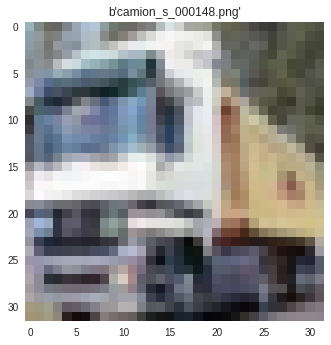

In [0]:
# Visualize the 10th image
pick = 1
print("Class =", classes_train[labels_train[pick]])
visualize_image(imgs_train, labels_train, names_train, pick)

Lets preprocess the images to get greyscale images, and subtract the mean value from them.

In [0]:
# Function to preprocess the images
def preprocess(imgs, mode='train', mean=None):
    
    #convert image array [50000 x 3072] to image [50000 x 32 x 32 x 3]
    imgs = imgs.reshape(imgs.shape[0], 3, 32, 32).transpose([0, 2, 3, 1])
    
    #convert to grayscale image [50000 x 32 x 32]
    imgs = np.dot(imgs[...,:3], [0.299, 0.587, 0.114])
    
    # If we are dealing with training images, compute the mean
    if mode == 'train':
        mean = np.mean(imgs, axis=0)
    
    #subtract by mean image
    imgs = imgs - mean
    
    #convert back to image array [50000 x 1024]
    print(imgs.shape)
    imgs = imgs.reshape(imgs.shape[0], 1024)
    print(imgs.shape)
    
    return imgs, mean

In [0]:
# Preprocess the images
imgs_train, mean = preprocess(imgs_train, mode='train')
imgs_test, _ = preprocess(imgs_test, mode='test', mean=mean)

(50000, 32, 32)
(50000, 1024)
(10000, 32, 32)
(10000, 1024)


### 1. First $N$ Principal Components with maximum eigenvalues

As we have learnt in the lecture, PCA finds the set of orthonormal vectors which best
describe the distribution of the underlying dataset. In the given dataset, we have $n$
images of size $K \times K$. (We know that $K = 32$, and $n = 50000$ in the image set chosen.

#### 1.1. Equations related to eigenvalues and eigenvectors

The first step towards finding Principal Components is to find the eigenvalues and eigenvectors of the co-variance matrix of our data.

From the last subsection, we have the data matrix $\pmb A$ as an $n \times K^2$ matrix.

In [0]:
# Assigning imgs to "A"
A = imgs_train

$\pmb C$, the covariance matrix of $\pmb A$, is shown in the below equation:

$$
% C = \frac{1}{n}\sum_{i=1}^{n}A^T.A
\pmb C = \frac{1}{n}\ (\pmb A^T.\pmb A)
$$

This can be coded in Python as : `C = 1 / A.shape[0] * np.dot(A.T, A)`. Its size is $K^2 \times K^2$, i.e. the shape of $\pmb C$ is $(K^2, K^2)$.

The eigenvaues and eigenvectors of $\pmb C$ can be found in Python as: `w, v = np.linalg.eig(C)`, where `w` are the eigenvalues, and `v` is the matrix of eigenvectors. They can also be computed using Singular Value Decomposition: `np.linalg.svd(A,full_matrices=False, compute_uv=True)` 

Since $\pmb C$ is a $K^2 \times K^2$ matrix, there should be $K^2$ eigenvalues, and $K^2$ eigenvectors each of $K^2$ dimensions. So `w` is a numpy array of shape ($K^2$,), i.e. it contains $K^2$ number of eigenvalues. `v` is a numpy array of shape ($K^2$, $K^2$), where each **column** of `v` is an eigenvector. So there are $K^2$ eigenvectors, each of shape ($K^2$,).

### 1.2. Problem

But, since our images are of size $32\times32$, i.e. $K = 32$, we shall be finding eigenvalues and eigenvectors of a $1024\times1024$-sized covariance matrix $C$. Computing $C$ and then $w$ (the eigenvalues) and $V$ (the eigenvectors) is an intractable task and may result in a Memory Error depending on the dataset used. (To be discussed in the next lecture)

### 1.3. Find eigenvalues and eigenvectors

**Exercise 1 : Write a function to find the eigenvalues and eigenvectors of the covariance of matrix A without finding C.**

The input to this function is a data matrix $\pmb A$ (i.e. `A = imgs_train`), and the outputs are `w` (eigenvalues) and `V` (eigenvectors) of $\pmb A^T.\pmb A$.

In [0]:
def find_eigenvalues_and_eigenvectors(A):
        #################################################
    ##     C = A.T.dot(A) / (len(A.T)-1) 
    ##     e, u = np.linalg.eig(C)\n,
    ##     w = e\n,
    ##     v = np.dot(A.T, u)\n,
    ##     return w, v
    #################################################
    ## The above approach using np.linalg.eig() might result in errors depending on the nature of C,
    ## hence we find solution using SVD (singular value decomposition)
    ## SVD decomposes A[1024 x 1024] into UwV,
    ## where U is [1024 x 1024], w is [1024,] and V is [1024 x 1024]
    ## the columns of U are the eigenvectors
    #################################################
    
    # Your code here
     #C is the determinant of the matrix
    C = 1 / len(A) * np.dot(A.T, A)
    
    #this will compute eigenvalues and eigen vectors
    U, w, VT = np.linalg.svd(C, compute_uv=True)
    return w, U

Using the above function, let us find the eigenvalues and eigenvectors in the training data.

In [0]:
eigenvalues_train, eigenvectors_train = find_eigenvalues_and_eigenvectors(imgs_train)
print(eigenvalues_train.shape)
print(eigenvectors_train.shape)
eigenvalues_test, eigenvectors_test = find_eigenvalues_and_eigenvectors(imgs_test)

(1024,)
(1024, 1024)


### 1.4. Reordering, normalizing

But, since we found the eigenvalues and eigenvectors in a roundabout way, we need to:
- reorder them so that they are in descending order of eigenvalues,
- normalize the eigenvectors so that their norms are 1.

In [0]:
# REORDER

# Find the required order of indices to make decreasing order of eigenvalue
sort_index = np.argsort(eigenvalues_train)[::-1]

# Use the calculated order of indices to reorder eigenvalues and eigenvectors
eigenvalues_train = eigenvalues_train[sort_index]
eigenvectors_train = eigenvectors_train[:, sort_index]

# Find the required order of indices to make decreasing order of eigenvalue
sort_index = np.argsort(eigenvalues_test)[::-1]

# Use the calculated order of indices to reorder eigenvalues and eigenvectors
eigenvalues_test = eigenvalues_test[sort_index]
eigenvectors_est = eigenvectors_test[:, sort_index]


#see top 3 eigenvalues
print(eigenvalues_train[:3])
print(eigenvectors_train[:3])

[1145216.33719859  469187.86368005  275125.62506827]
[[-0.04930287 -0.03217863 -0.02858416 ...  0.00216022  0.00481356
   0.01851747]
 [-0.04918112 -0.03271296 -0.02820369 ... -0.00205114 -0.01104136
  -0.03790172]
 [-0.04927026 -0.03337433 -0.02792019 ...  0.00119292  0.01437492
   0.04834882]]


As can be seen, the eigenvalues are in decreasing order. Let us check the norm of an eigenvector, it should be 1:

In [0]:
print(np.linalg.norm(eigenvectors_train[:,1]))    #checking if norm is 1
# NORMALIZE (no need to normalize when using SVD as it returns normalized eigenvectors)
# eigenvectors_train = eigenvectors_train / np.linalg.norm(eigenvectors_train, axis=0)

1.0000000000000004


### 1.5. Computing good value for $N$

In the given dataset, there are as many eigenvectors as the number of training examples. This can be verified by:

In [0]:
eigenvectors_train.shape

(1024, 1024)

Since each column is an eigenvector, there are 1024 eigenvectors, each of 1024 dimensions. But usually, a smaller number $N$ of eigenvectors is chosen as a basis to make feature vectors.

To decide on the number $N$, i.e. the number of most important eigenvectors to keep as the basis, the cumulative sum of eigenvalues (assuming they are in decreasing order) divided by the total sum of eigenvalues, vs. the number of eigenvalues considered ($N$) is plotted.

This plot shall show the fraction of total variance retained ($r$) vs. the number of eigenvalues considered ($N$). This way, the plot gives a good understanding of the point of diminishing returns, i.e. the point where little variance is retained by retaining additional eigenvalues.

This can be understood by the following equation:

$$r = \frac{\sum_{k=1}^{N}\lambda_k}{\sum_{k=1}^{n}\lambda_k},\ \ \ \  N << n$$

Plotting $r$ vs $N$ shall give a good idea of the impact of varying $N$ on $r$.

Let's say we want to retain only 80% of the variance involved. Then we should look for the minimum value of $N$ for which $r > 0.8$.

**Exercise 2 : Edit 1 line of code to calculate r, plot $r$ vs $M$.**

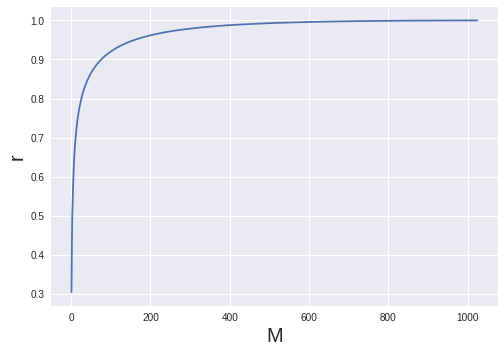

In [0]:
# Plot r vs M
# Values of M to consider: 1, 2,..., n
M = np.array(range(1, imgs_train.shape[1] + 1))

# Calculate r for all values of M
# Your code here
# Hint: Look for "numpy cumulative sum"
r = np.cumsum(eigenvalues_train)/np.sum(eigenvalues_train)

# Plot r vs M
plt.plot(M, r)
# We take only first 1024 eigenvectors because
# rest all correspond to eigen value 0
plt.xlabel("M", fontsize=20)
plt.ylabel("r", fontsize=20)
plt.grid("on")
plt.show()

We can see from the plot that an $M$ value of around 25 (out of 1024) gives an $r$ value of 0.8.

In [0]:
r[25]

0.8009697910061452

---- **(If it does not, please recheck your code.)**

So let us choose $N = 25$.

In [0]:
N = 25

This means we are choosing only $N$ **principal components**. In other words, we are choosing those $N$ types of information that are most important (preserving $80\%$ of the class variance but using only top 25 eigenvectors out of 1024).

Let us note the first N principal components, i.e. the first N eigenvectors:

In [0]:
pca_vectors_train = eigenvectors_train[:, :N]
pca_vectors_test = eigenvectors_test[:, :N]

### 1.6. Finding features using first $N$ Principal Components

Since we are using the most important eigenvectors as the _basis_ vectors, we need to project the data into these basis components to find the relevant features. We do this by finding the dot product of the data maxtrix and the matrix of the most important eigenvectors.

We know that the data is of shape $n \times K^2$. We also know that the `pca_vectors` matrix is of shape $K^2 \times N$.

**Exercise 3: Edit 1 line of code to find the pca_features of the data:**

In [0]:
pca_features_train = np.dot(imgs_train, pca_vectors_train)
pca_features_test = np.dot(imgs_test, pca_vectors_test)

print(imgs_train.shape)
print(pca_features_train.shape)

(50000, 1024)
(50000, 25)


Therefore, we have effectively reduced the dimension of features from 1024 to 25 while preserving 80% of variance in the data. We can see that we have transformed our data from $n \times K^2$ [50000 x 1024] to $n \times N$ [50000 x 25] where $N$ is the chosen number of principal components.

### 1.7. Visualizing Variance captured by topmost eigenvectors##

Let us visualize the range of values that each eigenvector is able to capture. This shall give us a good idea of the amount of variance each eigenvector is capturing.

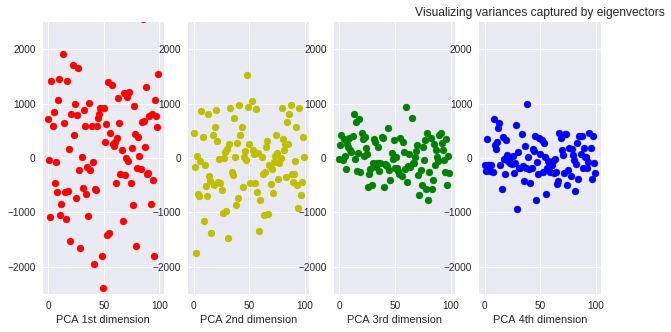

In [0]:
number_of_samples =  100
plt.figure(figsize=(10, 5))
plt.subplot(141)
plt.scatter(np.arange(number_of_samples), pca_features_train[:number_of_samples, 0], c='r')
plt.xlabel('PCA 1st dimension')
plt.ylim([-2500, 2500])
plt.subplot(142)
plt.scatter(np.arange(number_of_samples), pca_features_train[:number_of_samples, 1], c='y')
plt.xlabel('PCA 2nd dimension')
plt.ylim([-2500, 2500])
plt.subplot(143)
plt.scatter(np.arange(number_of_samples), pca_features_train[:number_of_samples, 3], c='g')
plt.xlabel('PCA 3rd dimension')
plt.ylim([-2500, 2500])
plt.subplot(144)
plt.scatter(np.arange(number_of_samples), pca_features_train[:number_of_samples, 4], c='b')
plt.xlabel('PCA 4th dimension')
plt.ylim([-2500, 2500])
plt.title('Visualizing variances captured by eigenvectors')
plt.show()

### 2. k Nearest Neighbours

By now, we are quite familiar with the kNN algorithm, so we shall use this to classify test images.

**Problem:** Given a test image, classify its label?

**Solution:** We shall give the test image's features to a kNN model, and take a majority vote on the k nearest features in the training set.



In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(pca_features_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

For example, we have trained knn algorithm for  $k = 3$, and predict the class of the $1^{st}$ image in the test set:

In [0]:
(neigh.predict(pca_features_test[1].reshape(1,-1)))[0]

8

We know that the label of the image is:

In [0]:
labels_test[1]

8

Thus, kNN has classified this image correctly.

### Use kNN to classify the first 10 test images using pca_features

In [0]:
predicted_labels_test = neigh.predict(pca_features_test[:10])

In [0]:
predicted_labels_test = list(predicted_labels_test)

In [0]:
labels_test[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(labels_test[:10],predicted_labels_test)

0.2

Thus, using top 25 pca features, we got 0.2 accuracy on the first 10 test images.

## Exercise 4: Experiment with different values of $N$ (5, 10, 20, 40, 100), and observe the effects on accuracy ###

In [0]:
# Your Code Here

### Summary

Thus PCA is used to identify a hyperplane that lies closest to the data points, and project the data onto it.

1.   List item
2.   List item



### Please answer the questions below to complete the experiment:




In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful. Ref: 2574
